In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mnistlike-dataset-squarecircletriangle/quiz_for_competition_r.csv
/kaggle/input/mnistlike-dataset-squarecircletriangle/answer_quiz_for_competition_r.csv
/kaggle/input/mnistlike-dataset-squarecircletriangle/train_data.csv


### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset loading

In [3]:
data = pd.read_csv("/kaggle/input/mnistlike-dataset-squarecircletriangle/train_data.csv")

print(f"data's shape: {data.shape}")
data.head()

data's shape: (200, 785)


,label,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P775,P776,P777,P778,P779,P780,P781,P782,P783,P784
0,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
1,0,254,255,255,254,255,255,255,255,0,...,255,255,255,255,255,255,255,255,255,255
2,0,255,254,255,255,254,255,253,255,254,...,254,255,254,255,255,255,255,255,255,255
3,0,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
4,0,255,255,255,255,255,255,255,255,253,...,255,255,255,255,255,255,255,255,255,255


### Visualisation

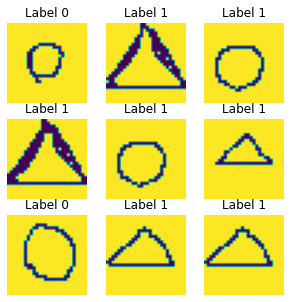

In [4]:
from PIL import Image

fig = plt.figure(figsize=(5, 5))

rows = 3
columns = 3

for i in range(9):
    j=np.random.randint(0,200)
    fig.add_subplot(rows, columns, i+1)
    img_arr=data.iloc[j,1:].values.reshape(28,28)
    label=str(data.iloc[j,0])
    plt.imshow(img_arr)
    plt.axis('off')
    plt.title("Label"+' '+label)

### Data processing

In [5]:
X=data.iloc[:,1:].values.astype('float32')
y=data.iloc[:,0].values.astype('int32')

In [6]:
# Normalizing the data
X /=255.0

# Reshaping from 784 to 28,28,1 for inputing into Conv2D
X=X.reshape(-1,28,28,1)
print(f"new shape of X: {X.shape}")

# One-Hot-Encoding of the label
from keras.utils.np_utils import to_categorical
y = to_categorical(y)

new shape of X: (200, 28, 28, 1)


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

### Generating the model

In [8]:
from tensorflow import keras
'''
Conv2D will read the shape of 4D dimension (num, height, weight, channels)
MaxPooling2D will project it to lower dimension, to accerelate the process
Flatten will reduce the size to 1D array
Dense is a normal neuron point
Dropout will throw away all the unneccesary neuron

'''
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding="SAME"),
    keras.layers.MaxPooling2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(units=3, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 64)        3200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 128)       73856     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 5, 5, 128)         147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 5, 5, 128)         1

In [9]:
model.compile(
    optimizer="rmsprop",
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [11]:
history = model.fit(
    X_train,y_train,
    validation_data=(X_valid,y_valid),
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
6/6 [==============================] - 2s 194ms/step - loss: 1.1172 - accuracy: 0.4371 - val_loss: 1.0739 - val_accuracy: 0.4500
Epoch 2/50
6/6 [==============================] - 1s 97ms/step - loss: 1.0838 - accuracy: 0.4293 - val_loss: 1.0817 - val_accuracy: 0.4500
Epoch 3/50
6/6 [==============================] - 1s 100ms/step - loss: 1.0580 - accuracy: 0.5115 - val_loss: 0.8343 - val_accuracy: 0.4500
Epoch 4/50
6/6 [==============================] - 1s 96ms/step - loss: 0.7968 - accuracy: 0.6022 - val_loss: 0.4935 - val_accuracy: 0.8000
Epoch 5/50
6/6 [==============================] - 1s 103ms/step - loss: 0.6492 - accuracy: 0.7133 - val_loss: 0.5641 - val_accuracy: 0.7500
Epoch 6/50
6/6 [==============================] - 1s 98ms/step - loss: 0.6638 - accuracy: 0.7081 - val_loss: 0.3474 - val_accuracy: 0.8500
Epoch 7/50
6/6 [==============================] - 1s 95ms/step - loss: 0.4700 - accuracy: 0.7895 - val_loss: 0.2200 - val_accuracy: 1.0000
Epoch 8/50
6/6 [========

### Model Evaluation

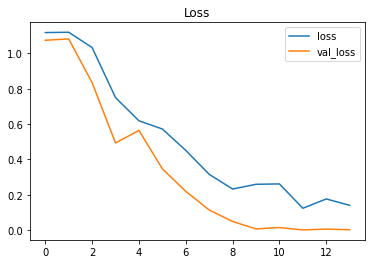

In [12]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
plt.title("Loss")
plt.show()

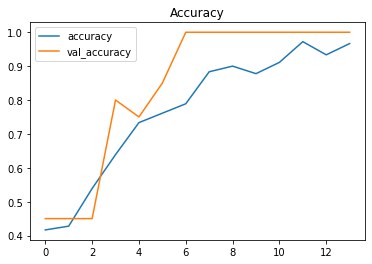

In [13]:
history_df.loc[0:, ['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

In [14]:
predictions = np.argmax(model.predict(X_valid), axis=-1)
to_categorical(predictions)

array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [15]:
labels=["circle","triangle","square"]
coded_labels=['[1. 0. 0.]','[0. 1. 0.]','[0. 0. 1.]']
pred_labels=[0,1,2]

arr_lab=dict(zip(coded_labels, labels))
int_lab=dict(zip(pred_labels, labels))

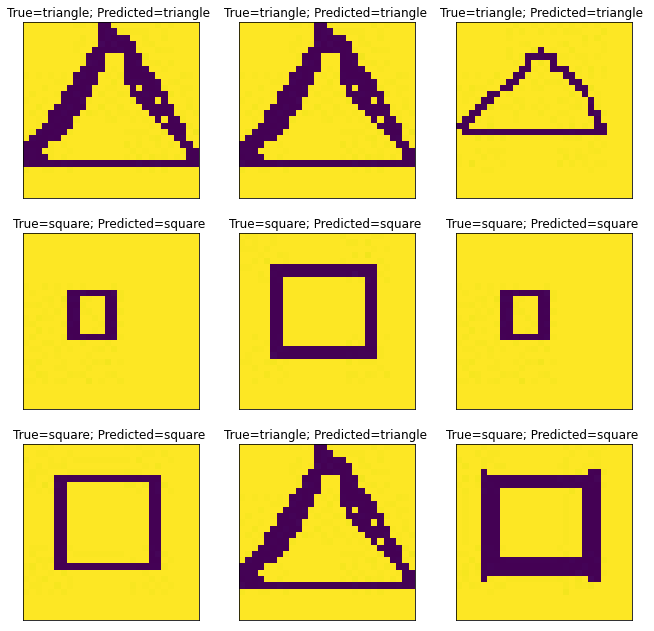

In [16]:
f, axs = plt.subplots(2,2,figsize=(11,11))
for i in range (0,9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    img_nbr = np.random.randint(0,len(predictions))
    plt.imshow(X_valid[img_nbr])
    plt.title("True={}; Predicted={} ".format(
         arr_lab[str(y_valid[img_nbr])],
         int_lab[predictions[img_nbr]]
        )
    )

In [18]:
from sklearn.metrics import classification_report
print(classification_report(y_valid,to_categorical(predictions)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00         7

   micro avg       1.00      1.00      1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20
 samples avg       1.00      1.00      1.00        20



### Submission

In [19]:
test=pd.read_csv("/kaggle/input/mnistlike-dataset-squarecircletriangle/quiz_for_competition_r.csv")
test.head()
test.shape

(200, 785)

In [20]:
X_test=test.iloc[:,1:].values.astype('float32')

In [21]:
# Normalizing the data
X_test /=255.0

# Reshaping from 784 to 28,28,1 for inputing into Conv2D
X_test=X_test.reshape(-1,28,28,1)

In [22]:
predictions = np.argmax(model.predict(X_test), axis=-1)
predictions

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1,
       1, 1])

In [23]:
sub=pd.DataFrame({
    'Category': predictions
})
sub.index.name='ID'
sub

,Category
ID,
0,1
1,0
2,0
3,0
4,0
...,...
195,0
196,1
197,1


In [24]:
sub.to_csv('submission1.csv')